# Project 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

Our PDE is the following:
$$
\begin{aligned}
    -\partial_x (\alpha (x) \partial_x u) + \partial_x (b(x) u) + c(x) u = f(x), \qquad  \text{in } \qquad \Omega=(0,1)  
\end{aligned}
$$

From this equation we can derive the following product for $F(v)$
$$
\begin{aligned}
a(u,v) &= F(v) \\
\end{aligned}
$$
which can be rewritten as
$$
\begin{aligned}
a(u,v) &= \int_0^1 \left(\alpha (x)u_x v_x - b(x)u v_x  + c(x)u v \right)dx,
\end{aligned}
$$

We want to solve the PDE problem by creating a linear system given on the form:


$$A \vec U = \vec F$$

where
$$A_{ij}=a(\phi_j,\phi_i),\qquad \vec U = [U_0 , \dots, U_M],\qquad \vec F = [ F(\phi_0), \dots, F(\phi_M) ]$$

We chose to use local basis for $X^1_h|_{K} = \mathbb{P}_1(K)$. We the get the following expression for our basis function in diffrenet triangulation $K_i$.


$$
\mathbb{P}_1(K) = span\{\phi^i_0,\phi^i_1\} \\
\begin{aligned}
&\phi_{i-1}|_{K_i} =\phi_0^i = 1- \frac{x}{h_i}, \qquad (\phi_0^i)\prime =-\frac{1}{h_i} \\
&\phi_{i}|_{K_i} =\phi_1^i = \frac{x}{h_i}, \qquad (\phi_1^i)\prime =+\frac{1}{h_i} \\
&\phi_{j}|_{K_i} = 0 \\
\end{aligned}
$$

We then have to solve $a^{K_i}(\phi_i,\phi_j)$ for the diffrent possible interactions:

$a^{K_i}(\phi_{i},\phi_{i})$:
$$
\begin{aligned}
a^{k_i}(\phi_i,\phi_i) &= \int_{0}^{h_i} \left(\alpha (\phi_1^i)\prime (\phi_1^i)\prime - b (\phi_1^i) (\phi_1^i)\prime  + c (\phi_1^i) (\phi_1^i) \right)dx \\
&=\int_{0}^{h_i} \left(\alpha (\frac{1}{h_i})(\frac{1}{h_i})- b (\frac{x}{h_i}) (\frac{1}{h_i})  + c (\frac{x}{h_i}) (\frac{x}{h_i}) \right)dx \\
&=\alpha \frac{h_i}{h_i^2}- \frac{b}{2}\frac{h_i^2}{h_i^2}  + \frac{c}{3}\frac{h_i^3}{h_i^2} \\
&= \frac{\alpha}{h_i}- \frac{b}{2} + \frac{c}{3}h_i 
\end{aligned}
$$

$a^{K_i}(\phi_{i-1},\phi_{i-1})$:
$$
\begin{aligned}
a^{K_i}(\phi_{i-1},\phi_{i-1}) &= \int_{0}^{h_i} \left(\alpha (\phi_0^i)\prime (\phi_0^i)\prime - b (\phi_0^i) (\phi_0^i)\prime  + c (\phi_0^i) (\phi_0^i) \right)dx \\
&=\int_{0}^{h_i} \left(\alpha (\frac{-1}{h_i})(\frac{-1}{h_i})- b (1-\frac{x}{h_i}) (\frac{-1}{h_i})  + c (1-\frac{x}{h_i}) (1- \frac{x}{h_i}) \right)dx \\
&= [\frac{x}{h_i^2} - b(\frac{-x}{h_i}+\frac{x^2}{2h_i^2}) + c(x-\frac{x^2}{h_i} +\frac{x^3}{3h_i^2})]_0^1\\
&=\alpha \frac{h_i}{h_i^2} + \frac{b}{2}\frac{h_i^2}{h_i^2}  + \frac{c}{3}\frac{h_i^3}{h_i^2} \\
&= \frac{\alpha}{h_i} + \frac{b}{2} + \frac{ch_i}{3} 
\end{aligned}
$$

$a^{K_i}(\phi_{i-1},\phi_{i})$:
$$
\begin{aligned}
a^{K_i}(\phi_{i-1},\phi_{i}) &= \int_{0}^{h_i} \left(\alpha (\phi_0^i)\prime (\phi_1^i)\prime - b (\phi_0^i) (\phi_1^i)\prime  + c (\phi_0^i) (\phi_1^i) \right)dx \\
&= \int_{0}^{h_i} \left(\alpha (-\frac{1}{h_i} \frac{1}{h_i})- b (1- \frac{x}{h_i}) \frac{1}{h_i} + c (1- \frac{x}{h_i}) \frac{x}{h_i} \right)dx \\
&= -\alpha (\frac{h_i}{h_i^2})- b (\frac{h_i}{h_i}- \frac{h_i}{2 h_i}) + c (\frac{h_i^2}{2h_i} - \frac{h_i^3}{3 h_i^2}) \\
&= \frac{-\alpha}{h_i}- \frac{b}{2} + \frac{c h_i}{6} \\
\end{aligned}
$$

$a^{K_i}(\phi_{i},\phi_{i-1})$:
$$
\begin{aligned}
a^{K_i}(\phi_{i-1},\phi_{i}) = \frac{-\alpha}{h_i} + \frac{b}{2} + \frac{c h_i}{6} \\
\end{aligned}
$$


We combine each of the rows to an expression for our matrix block $A^{k_i}$

$$
\begin{aligned}
A^{k_i}&=
\begin{bmatrix}
a^{K_i}(\phi_{i-1},\phi_{i-1}) & a^{K_i}(\phi_{i-1},\phi_{i}) \\
a^{K_i}(\phi_{i},\phi_{i-1}) & a^{K_i}(\phi_{i},\phi_{i})
\end{bmatrix} \\
&= \frac{\alpha}{h_i}
\begin{bmatrix}
1 & -1 \\
-1 & 1 
\end{bmatrix}
-\frac{b}{2}
\begin{bmatrix}
-1 & -1 \\
1 & 1 
\end{bmatrix}
+\frac{ch_i}{3}
\begin{bmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1 
\end{bmatrix}
\end{aligned}
$$

In [2]:
def analytic_func_1(x):
    return x*(1-x)

def f_func_1(x,a,b,c):
    return 2*a + b*(1-2*x) + c*(x-x**2)

In [3]:
def loc2glob(k,alpha):
    return k+alpha          # Numbering k from 0

In [4]:
def Assembley_algorithme(c_1, c_2, c_3, A_1, A_2, A_3, f_1, M_i, H_i,x_grid, func):
    A = np.zeros((M_i,M_i))
    f_vec = np.zeros((M_i))
    
    f_values = func(x_grid,c_1,c_2,c_3)
    
    for k in range(0,(M_i-1)):
        for alpha in range(2):
            i=loc2glob(k,alpha)
            for beta in range(2):
                j = loc2glob(k,beta)
                A[i,j] += c_1*A_1[alpha,beta]/H_i[k] + (c_2/2)*A_2[alpha,beta] + (c_3*H_i[k]/3)*A_3[alpha,beta]
            f_vec[i] += H_i[k]*f_values[i]*f_1[alpha]
            
    return A[1:-1,1:-1], f_vec[1:-1]




In [5]:
def solver_a(a, b, c, x_grid, rhs_f):
    M = len(x_grid)
    T = np.transpose(np.array([x_grid[:-1],x_grid[1:]]))
    H=np.diff(x_grid)
    H_size = len(H)

    A_1 = np.array([[1,-1],[-1,1]])
    A_2 = np.array([[-1,1],[-1,1]])
    A_3 = np.array([[1,1/2],[1/2,1]])

    f_1 = np.array([0.5,0.5])                                                      #Trapizodial methode
    A,f= Assembley_algorithme(a,b,c,A_1,A_2,A_3,f_1,M,H,x_grid, rhs_f)             #Asembly of stifness matrix and load vector

    U=np.zeros(M)
    U[0]=0
    U[-1]=0
    
    U_prime = np.linalg.solve(A,f)
    U[1:-1] = U_prime

    return U

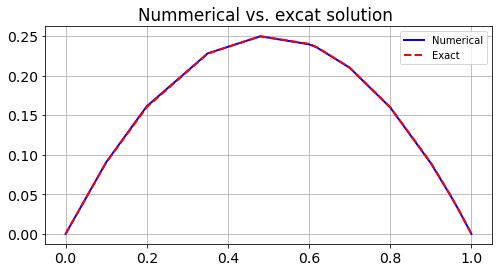

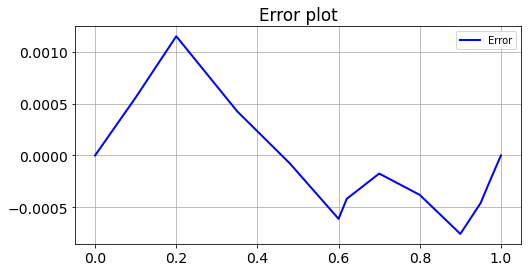

In [6]:
np.random.seed(0)


a=1
b=2
c=3
M=101
#x_grid = np.linspace(0,1,M)
x_grid = np.array([0, 0.1, 0.2,0.35,0.48,0.6,0.62, 0.7, 0.8, 0.9, 0.95, 0.97, 1])

U = solver_a(a, b, c, x_grid, f_func_1)
solution = analytic_func_1(x_grid)

plt.figure()
plt.title("Nummerical vs. excat solution ")
plt.plot(x_grid,U,'b', label= "Numerical")
plt.plot(x_grid, solution, "r--", label= "Exact")
plt.legend(fontsize="10", loc="upper right")
plt.show()

plt.figure()
plt.title("Error plot")
plt.plot(x_grid,U-solution,'b', label= "Error")
plt.legend(fontsize="10", loc="upper right")
plt.show()



## Task b
We want to calculate the converegence rate for our solver in both $H^1$ and $L^2$ on $[0,1]$. To find the convergence rate we use the standard estimate of error in both norms $||u-u_h||$.

##### $L^2$:

$$
||u-u_h||_{L^2} = \sqrt{\int^1_0 |u(x)-u_h(x)|^2 dx} \approx \sqrt{\Sigma^M_{i=0} |u(x_i)-u_h(x_i)|^2 \cdot h_i} = \sqrt{\Sigma^M_{i=0} |u_i-u_{h,i}|^2\cdot h_i}
$$


In [16]:
#Reuse convergence-tester from lecture-code. Modify it to fit our impl
def convergence_test_space(a, b, c, rhs_func, u_analytic, solver=solver_a):
    P = 6
    Hconv = np.zeros(P)
    Kconv = np.zeros(P)
    Econv = np.zeros(P)
    M = 8
    for p in range(P):
        x_grid = np.linspace(0,1,M)
        
        U  = solver(1, 2, 3, x_grid, rhs_func)
        solution = u_analytic(x_grid)
        
        Eh=U-solution
        
        Hconv[p] = (x_grid[1]-x_grid[0])
        Econv[p] = np.sqrt( np.sum( np.abs(Eh)**2 * Hconv[p] ) )
        M = 2*M

    order = np.polyfit(np.log(Hconv),np.log(Econv),1)[0]
    return Hconv, Econv, order

In [17]:
H_conv, E_conv, p = convergence_test_space(1, 2, 3, f_func_1, analytic_func_1, solver_a)

import pandas as pd #To format the output of the notebook.  
Rate=np.zeros(np.size(E_conv))
Rate[1:]=np.log10(E_conv[1:]/E_conv[:-1])/np.log10(H_conv[1:]/H_conv[:-1])
pd.options.display.float_format = '{:.8f}'.format
df = pd.DataFrame(data={'h': H_conv, 'Error': E_conv , 'Rate':Rate}) 
df


,h,Error,Rate
0,0.14285714,0.00138172,0.00000000
1,0.06666667,0.00029914,2.00772566
2,0.03225806,0.00006995,2.00180491
3,0.01587302,0.00001693,2.00043200
4,0.00787402,0.00000417,2.00010548
5,0.00392157,0.00000103,2.00002599


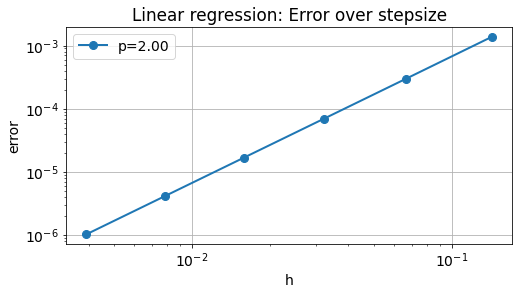

In [18]:
plt.loglog(H_conv,E_conv,'o-', label='p={:.2f}'.format(p))
plt.grid('on')
plt.xlabel('h')
plt.ylabel('error')
plt.title("Linear regression: Error over stepsize")
plt.legend();